C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16428\1251537592.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='category', data=category_sales, palette=['#8F87F1', '#C68EFD', '#E9A5F1', '#FED2E2'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16428\1251537592.py:21: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='quantity', y='category', data=category_sales, palette=['#8F87F1', '#C68EFD', '#E9A5F1', '#FED2E2'])


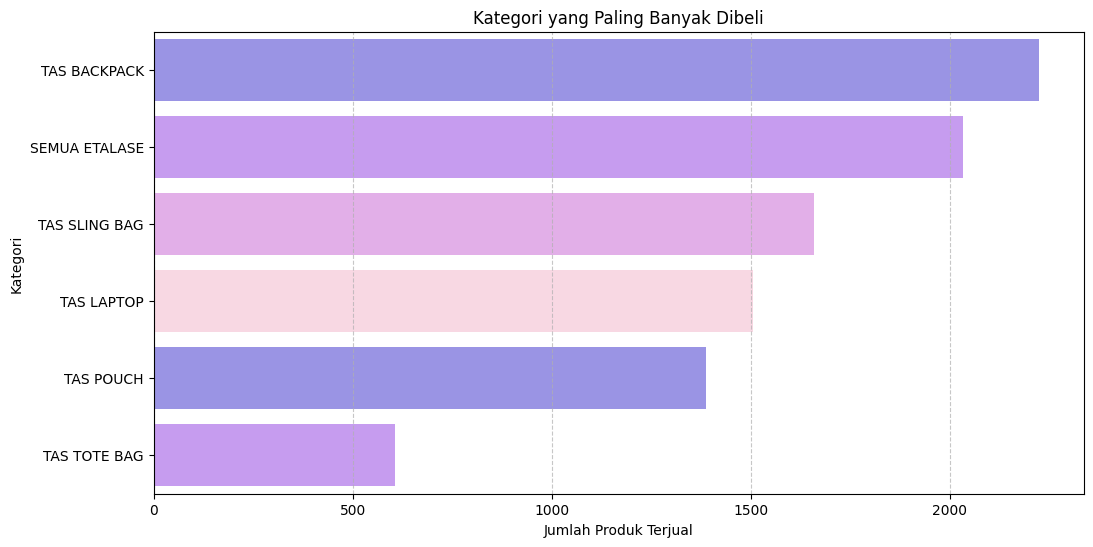

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
order_data = pd.read_csv('clean-data/data_order_tokped.csv')  # Pastikan path file benar
stock_data = pd.read_csv('clean-data/data_stock_exsport.csv')  # Pastikan path file benar
category_data = pd.read_csv('clean-data/data_category_exsport.csv')

# Gabungkan data kategori dengan data penjualan
merged_data = order_data.merge(stock_data, on='product_id', how='left')
merged_data = merged_data.merge(category_data, on='category_id', how='left')

# Hitung jumlah produk terjual per kategori
category_sales = merged_data.groupby('category')['quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# Buat bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='category', data=category_sales, palette=['#8F87F1', '#C68EFD', '#E9A5F1', '#FED2E2'])
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Kategori')
plt.title('Kategori yang Paling Banyak Dibeli')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()


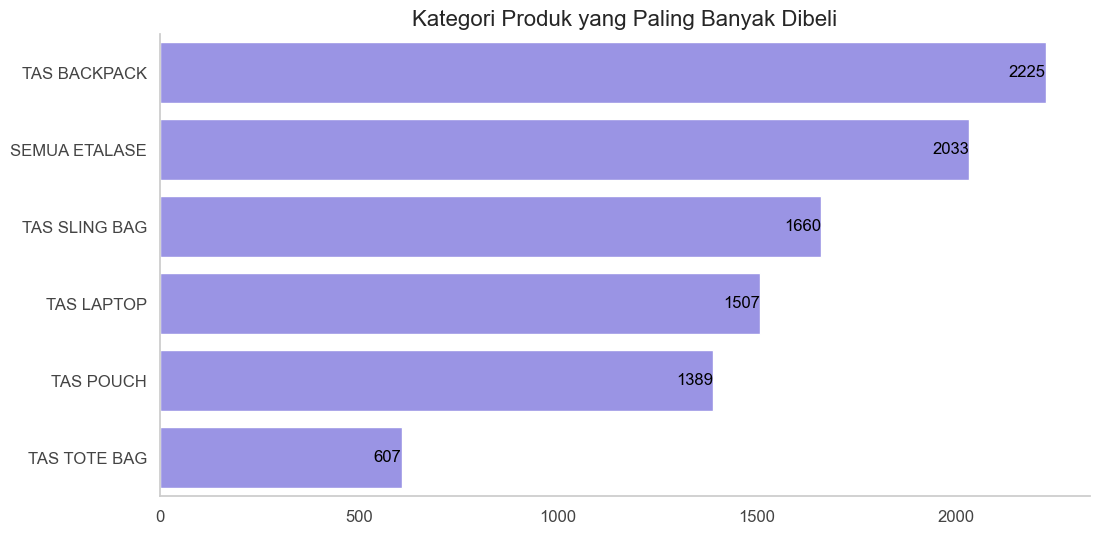

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
order_data = pd.read_csv('clean-data/data_order_tokped.csv')  # Pastikan path file benar
stock_data = pd.read_csv('clean-data/data_stock_exsport.csv')  # Pastikan path file benar
category_data = pd.read_csv('clean-data/data_category_exsport.csv')

# Gabungkan data kategori dengan data penjualan
merged_data = order_data.merge(stock_data, on='product_id', how='left')
merged_data = merged_data.merge(category_data, on='category_id', how='left')

# Hitung jumlah produk terjual per kategori
category_sales = merged_data.groupby('category')['quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# Set style
sns.set(style="whitegrid")

# Warna seragam
color_palette = "#8F87F1"

# Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
bars = sns.barplot(
    x='quantity', 
    y='category', 
    data=category_sales, 
    color=color_palette
)

# Tambahkan label langsung di atas bar
for bar in bars.patches:
    ax.text(
        bar.get_width(),  # Posisi x (akhir bar)
        bar.get_y() + bar.get_height() / 2,  # Posisi y (tengah bar)
        f'{int(bar.get_width())}',  # Nilai
        ha='right', va='center', fontsize=12, fontweight='light', color='black'
    )

# Hapus border dan gridline
sns.despine()
ax.grid(False)

# Ubah warna label (lighten labels)
ax.set_xlabel("", fontsize=14, color="#666666")
ax.set_ylabel("", fontsize=14, color="#666666")
ax.set_title("Kategori Produk yang Paling Banyak Dibeli", fontsize=16, fontweight="light")

# Ubah warna ticks (lighten labels)
plt.xticks(fontsize=12, color="#444444")
plt.yticks(fontsize=12, color="#444444")

# Tampilkan plot
plt.show()

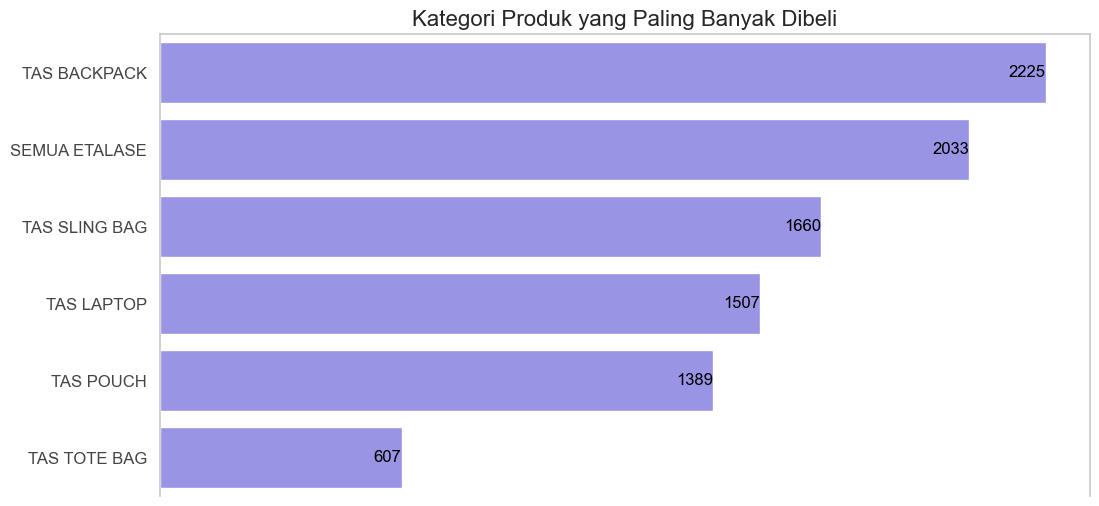

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
order_data = pd.read_csv('clean-data/data_order_tokped.csv')  # Pastikan path file benar
stock_data = pd.read_csv('clean-data/data_stock_exsport.csv')  # Pastikan path file benar
category_data = pd.read_csv('clean-data/data_category_exsport.csv')

# Gabungkan data kategori dengan data penjualan
merged_data = order_data.merge(stock_data, on='product_id', how='left')
merged_data = merged_data.merge(category_data, on='category_id', how='left')

# Hitung jumlah produk terjual per kategori
category_sales = merged_data.groupby('category')['quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# Set style
sns.set(style="whitegrid")

# Warna seragam
color_palette = "#8F87F1"

# Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
bars = sns.barplot(
    x='quantity', 
    y='category', 
    data=category_sales, 
    color=color_palette
)

# Tambahkan label langsung di atas bar
for bar in bars.patches:
    ax.text(
        bar.get_width(),  # Posisi x (akhir bar)
        bar.get_y() + bar.get_height() / 2,  # Posisi y (tengah bar)
        f'{int(bar.get_width())}',  # Nilai
        ha='right', va='center', fontsize=12, fontweight='light', color='black'
    )

# Hapus border bawah
ax.spines['bottom'].set_visible(False)

# Hilangkan angka di sumbu X
ax.set_xticks([])

# Hapus gridline
ax.grid(False)  # Mematikan semua grid

# Ubah warna label (lighten labels)
ax.set_xlabel("", fontsize=14, color="#666666")
ax.set_ylabel("", fontsize=14, color="#666666")
ax.set_title("Kategori Produk yang Paling Banyak Dibeli", fontsize=16, fontweight="light")

# Ubah warna ticks (lighten labels)
plt.yticks(fontsize=12, color="#444444")

# Tampilkan plot
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16428\4053104450.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color="#444444")


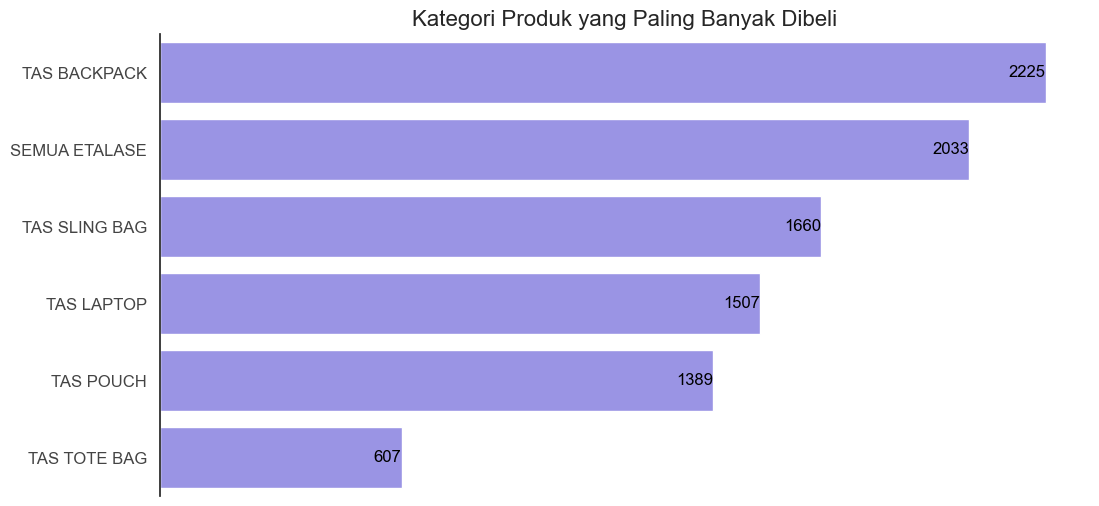

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
order_data = pd.read_csv('clean-data/data_order_tokped.csv')  # Pastikan path file benar
stock_data = pd.read_csv('clean-data/data_stock_exsport.csv')  # Pastikan path file benar
category_data = pd.read_csv('clean-data/data_category_exsport.csv')

# Gabungkan data kategori dengan data penjualan
merged_data = order_data.merge(stock_data, on='product_id', how='left')
merged_data = merged_data.merge(category_data, on='category_id', how='left')

# Hitung jumlah produk terjual per kategori
category_sales = merged_data.groupby('category')['quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# Set style
sns.set(style="white")

# Warna seragam
color_palette = "#8F87F1"

# Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
bars = sns.barplot(
    x='quantity', 
    y='category', 
    data=category_sales, 
    color=color_palette
)

# Tambahkan label langsung di atas bar
for bar in bars.patches:
    ax.text(
        bar.get_width(),  # Posisi x (akhir bar)
        bar.get_y() + bar.get_height() / 2,  # Posisi y (tengah bar)
        f'{int(bar.get_width())}',  # Nilai
        ha='right', va='center', fontsize=12, fontweight='light', color='black'
    )

# Hapus border hanya di sumbu atas, kanan, dan bawah
sns.despine(left=False, bottom=True, right=True, top=True)

# Hapus angka di sumbu X (tetap tampilkan kategori di sumbu Y)
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")  # Ini menghapus label 'category'

# Perbaiki tampilan label kategori agar lebih ringan
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color="#444444")

# Tambahkan judul
ax.set_title("Kategori Produk yang Paling Banyak Dibeli", fontsize=16, fontweight="light")

# Tampilkan plot
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16428\4160032570.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color="#444444")


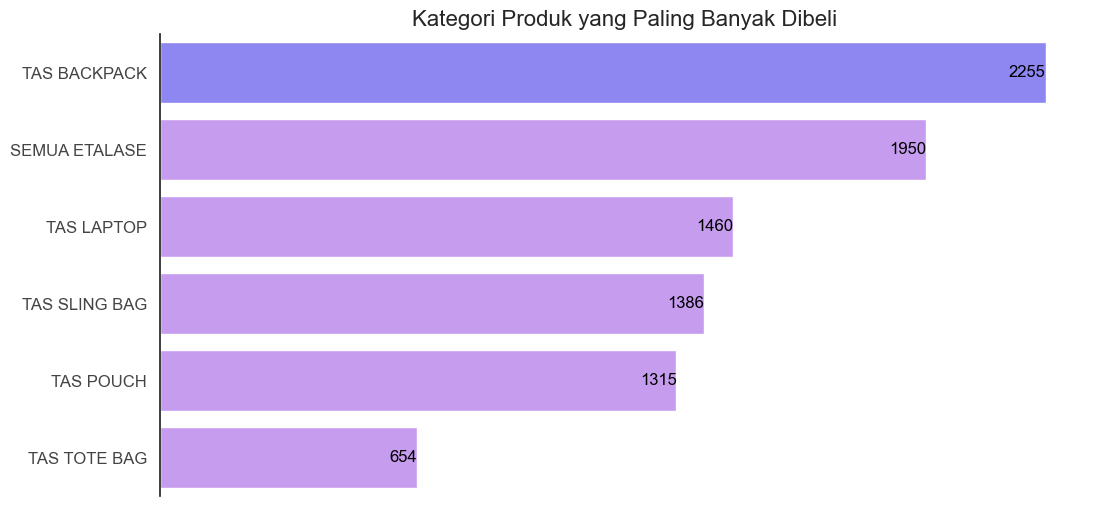

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
order_data = pd.read_csv('clean-data/data_order_tokped.csv')  # Pastikan path file benar
stock_data = pd.read_csv('clean-data/data_stock_exsport.csv')  # Pastikan path file benar
category_data = pd.read_csv('clean-data/data_category_exsport.csv')

# Gabungkan data kategori dengan data penjualan
merged_data = order_data.merge(stock_data, on='product_id', how='left')
merged_data = merged_data.merge(category_data, on='category_id', how='left')

# Hitung jumlah produk terjual per kategori
category_sales = merged_data.groupby('category')['quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# Set style
sns.set(style="white")

# Warna palet yang diberikan
color_palette = ["#8F87F1", "#C68EFD", "#E9A5F1", "#FED2E2"]

# Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart tanpa palet warna untuk kategori
bars = sns.barplot(
    x='quantity', 
    y='category', 
    data=category_sales, 
    color=color_palette[1]  # Warna default untuk kategori lainnya
)

# Warna khusus untuk kategori teratas
bars.patches[0].set_facecolor(color_palette[0])  # Warna untuk kategori teratas

# Tambahkan label langsung di atas bar
for bar in bars.patches:
    ax.text(
        bar.get_width(),  # Posisi x (akhir bar)
        bar.get_y() + bar.get_height() / 2,  # Posisi y (tengah bar)
        f'{int(bar.get_width())}',  # Nilai
        ha='right', va='center', fontsize=12, fontweight='light', color='black'
    )

# Hapus border hanya di sumbu atas, kanan, dan bawah
sns.despine(left=False, bottom=True, right=True, top=True)

# Hapus angka di sumbu X (tetap tampilkan kategori di sumbu Y)
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")  # Ini menghapus label 'category'

# Perbaiki tampilan label kategori agar lebih ringan
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color="#444444")

# Tambahkan judul
ax.set_title("Kategori Produk yang Paling Banyak Dibeli", fontsize=16, fontweight="light")

# Tampilkan plot
plt.show()

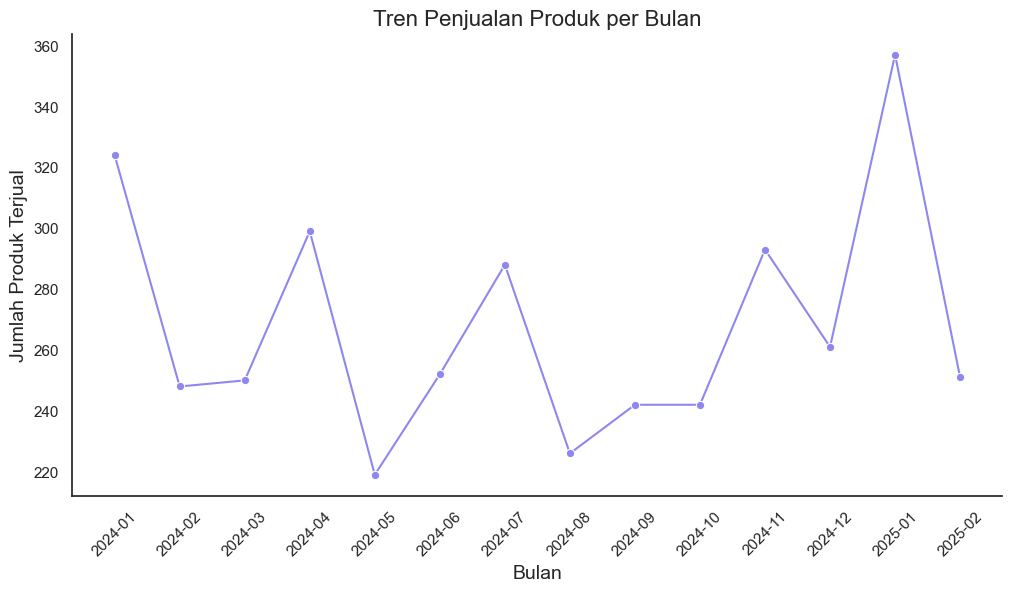

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_orders = pd.read_csv('clean-data/data_order_tokped.csv')

# Konversi kolom order_date ke datetime
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Buat kolom 'year_month' untuk grup berdasarkan bulan
df_orders['year_month'] = df_orders['order_date'].dt.to_period('M')

# Menghitung total penjualan per bulan
monthly_sales = df_orders.groupby('year_month')['quantity'].sum().reset_index()

# Mengonversi 'year_month' ke tipe string
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))

# Menggambar garis tren tanpa grid dan border
sns.lineplot(x='year_month', y='quantity', data=monthly_sales, marker='o', color='#8F87F1')

# Mengatur elemen-elemen grafik
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Produk Terjual', fontsize=14)
plt.title('Tren Penjualan Produk per Bulan', fontsize=16)

# Menghilangkan grid dan border
sns.despine()  # Menghilangkan border
plt.grid(False)  # Menghilangkan grid

# Memutar label x-axis
plt.xticks(rotation=45)

# Menampilkan grafik
plt.show()

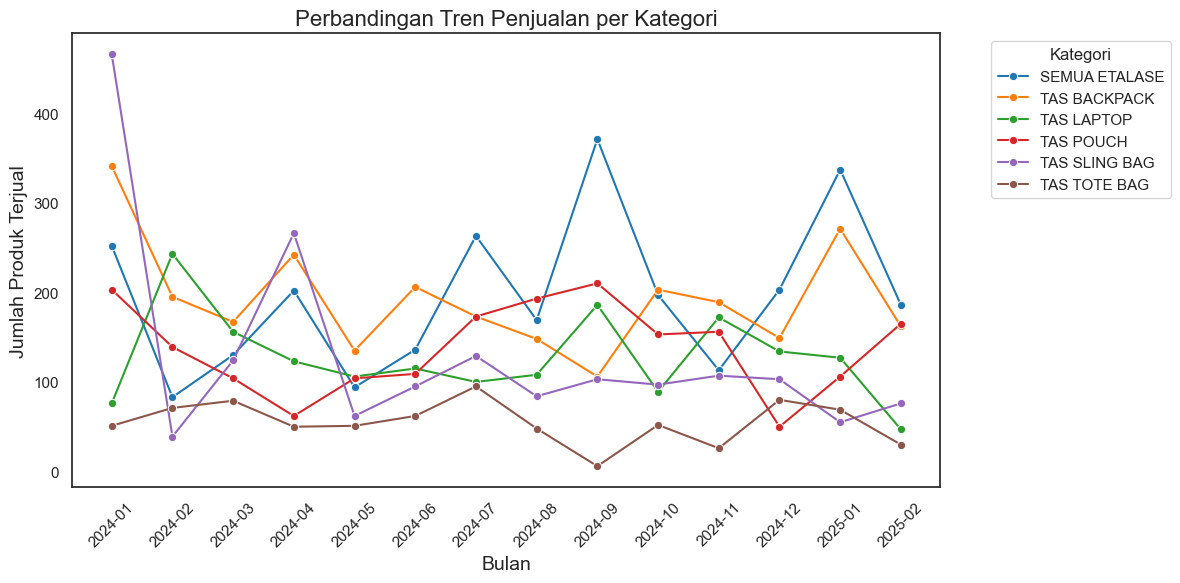

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
df_orders = pd.read_csv('clean-data/data_order_tokped.csv')
df_products = pd.read_csv('clean-data/data_product_exsport.csv')
df_categories = pd.read_csv('clean-data/data_category_exsport.csv')
df_stock = pd.read_csv('clean-data/data_stock_exsport.csv')

# Mengonversi kolom order_date ke datetime
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Menambahkan kolom 'year_month' untuk grup berdasarkan bulan
df_orders['year_month'] = df_orders['order_date'].dt.to_period('M')

# Menggabungkan data penjualan dengan produk untuk mendapatkan product_id
df_sales = df_orders.merge(df_products[['product_id']], on='product_id', how='left')

# Menggabungkan dengan data stok untuk mendapatkan category_id dan color_id
df_sales = df_sales.merge(df_stock[['product_id', 'color_id', 'category_id']], on=['product_id', 'color_id'], how='left')

# Menggabungkan dengan data kategori untuk mendapatkan nama kategori
df_sales = df_sales.merge(df_categories[['category_id', 'category']], on='category_id', how='left')

# Menghitung total penjualan per kategori per bulan
monthly_category_sales = df_sales.groupby(['year_month', 'category'])['quantity'].sum().reset_index()

# Mengonversi 'year_month' ke tipe string untuk sumbu X
monthly_category_sales['year_month'] = monthly_category_sales['year_month'].astype(str)

# Plotting perbandingan tren per kategori
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='quantity', hue='category', data=monthly_category_sales, marker='o', palette='tab10')

# Ubah label dan title
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Produk Terjual', fontsize=14)
plt.title('Perbandingan Tren Penjualan per Kategori', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan grafik
plt.tight_layout()
plt.show()


TypeError: Invalid object type at position 0

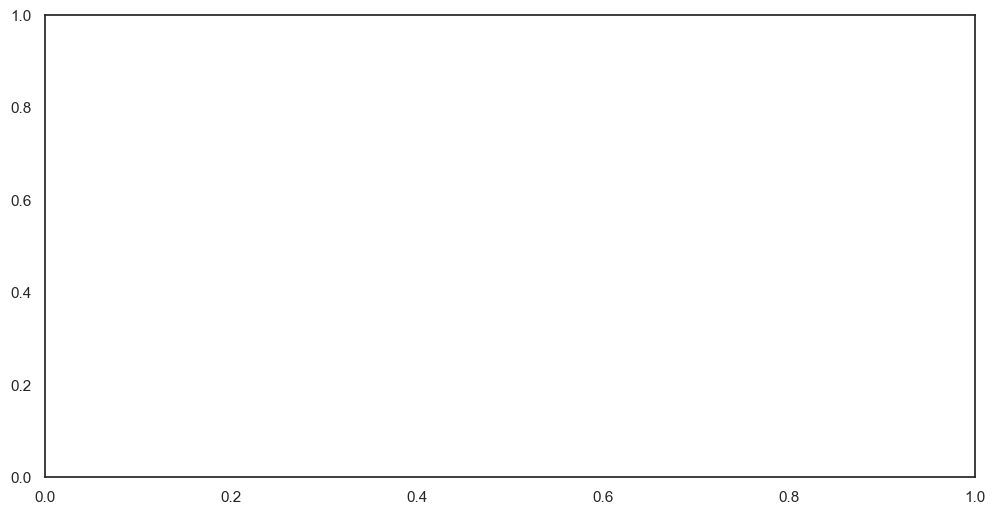

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
df_orders = pd.read_csv('clean-data/data_order_tokped.csv')
df_products = pd.read_csv('clean-data/data_product_exsport.csv')
df_categories = pd.read_csv('clean-data/data_category_exsport.csv')
df_stock = pd.read_csv('clean-data/data_stock_exsport.csv')

# Mengonversi kolom order_date ke datetime
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Menambahkan kolom 'year_month' untuk grup berdasarkan bulan
df_orders['year_month'] = df_orders['order_date'].dt.to_period('M')

# Menggabungkan data penjualan dengan produk untuk mendapatkan product_id
df_sales = df_orders.merge(df_products[['product_id']], on='product_id', how='left')

# Menggabungkan dengan data stok untuk mendapatkan category_id dan color_id
df_sales = df_sales.merge(df_stock[['product_id', 'color_id', 'category_id']], on=['product_id', 'color_id'], how='left')

# Menggabungkan dengan data kategori untuk mendapatkan nama kategori
df_sales = df_sales.merge(df_categories[['category_id', 'category']], on='category_id', how='left')

# Menghitung total penjualan per kategori per bulan
monthly_category_sales = df_sales.groupby(['year_month', 'category'])['quantity'].sum().reset_index()

# Menambahkan warna lebih banyak dalam palet
palette = ['#8F87F1', '#C68EFD', '#E9A5F1', '#FED2E2', '#7C4DFF', '#FF7CBB']  # Tambahkan warna lebih banyak

# Plotting perbandingan tren per kategori
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='quantity', hue='category', data=monthly_category_sales, marker='o', palette=palette)

# Ubah label dan title
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Produk Terjual', fontsize=14)
plt.title('2024 - Feb 2025', fontsize=16)

# Mengubah tampilan sumbu X
plt.xticks(rotation=45)

# Menghilangkan grid dan border
plt.grid(False)
sns.despine()

# Menampilkan grafik
plt.tight_layout()
plt.show()
